In [1]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')
import os
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool

from src import setup
# setup.use_gpu()

In [2]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    random_unitary,
    simulation)

In [3]:
bath_size = 4
hot_pop = .49
cold_pop = .01

system_size = 4
system_pop = .25


pops =  [system_pop for _ in range(system_size)] + [hot_pop for _ in range(bath_size)] + [cold_pop for _ in range(bath_size)] 
print(pops)
system = DM.n_thermal_qbits(pops)

[0.25, 0.25, 0.25, 0.25, 0.49, 0.49, 0.49, 0.49, 0.01, 0.01, 0.01, 0.01]


In [4]:
interacting_with_the_hot_bath = [np.array([0,1,2,3,4,5,6,7]),np.array([8,9,10,11])]
interacting_with_the_cold_bath = [np.array([0,1,2,3,8,9,10,11]),np.array([4,5,6,7])]
interacting_with_the_self = [np.array([0,1,2,3]),np.array([4,5,6,7]),np.array([8,9,10,11])]

In [5]:
orders = [interacting_with_the_hot_bath for _ in range(10)]
orders += [interacting_with_the_self for _ in range(10)]
orders += [interacting_with_the_cold_bath for _ in range(10)]
orders += [interacting_with_the_hot_bath for _ in range(10)]
orders += [interacting_with_the_self for _ in range(10)]
orders += [interacting_with_the_cold_bath for _ in range(10)]
orders += [interacting_with_the_hot_bath for _ in range(10)]
orders += [interacting_with_the_self for _ in range(10)]
orders += [interacting_with_the_cold_bath for _ in range(10)]
num_iterations = 90

In [6]:
measurments = [measure.pops, measure.extractable_work_of_each_qubit]
results = sim.run(system,
                      measurement_set = measurments,
                      num_iterations=num_iterations,
                      orders = orders,
                  # qbits_to_measure = [0,1,2,3],
                  verbose = True
                      )[0];

using random unitaries
0.0


In [7]:
sample_pops = results[0]
samples_extractable_work = results[1]

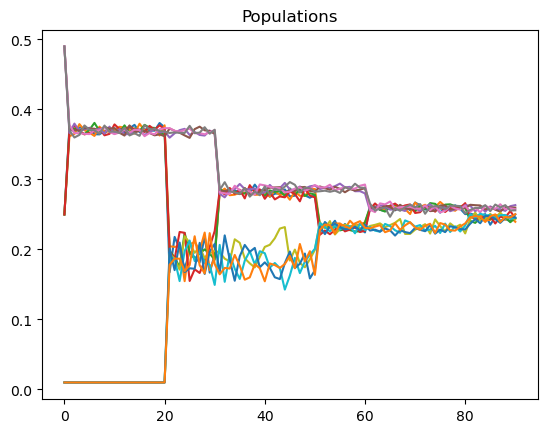

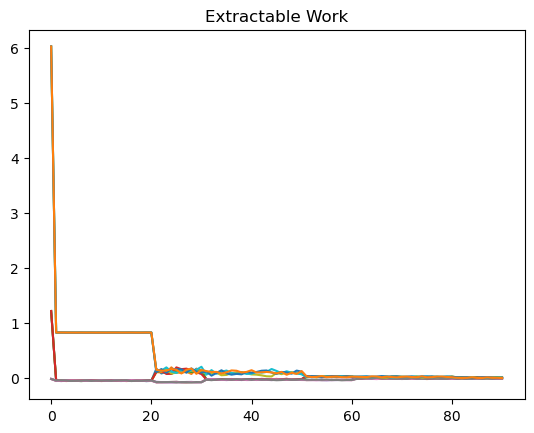

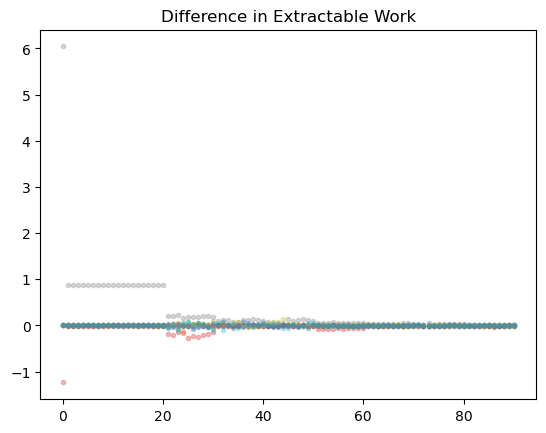

In [8]:
plt.plot(sample_pops)
plt.title("Populations")
plt.show()
plt.plot(samples_extractable_work)
plt.title("Extractable Work")
plt.show()
plt.plot([np.diff(results,1,0)for results in samples_extractable_work],'.',alpha = .3)
plt.title("Difference in Extractable Work")
plt.show()